# **Analyzing Bundasliga: Exploring Player's Valuation by Position and Nationality**
 

<br>

**Abinan Suthakaran**


<br>
<br>

## **1. Introduction**

<br>


In this project, I explored the Bundesliga, Germany’s top-tier football league which consistently produces world-class talent and competitive football. As a football player and growing enthusiast of European football, I am intrigued by the diverse mix of players, their roles on the field, and the global illustration within the league. Though I am still expanding my knowledge of the Bundesliga I admire its ability to encourage veterans and rising stars. Players like Manuel Neuer, Thomas Müller, and Joshua Kimmich represent the league’s emphasis on skill, discipline, and teamwork making it a captivating subject for analysis.


<br>

The dataset utilized in this project provides a detailed overview of Bundesliga players including their market prices, positions, nationalities, and contract details. My curiosity lies in exploring how these factors interact particularly focusing on players’ market prices. The dataset spans multiple positions, from goalkeepers to forwards, and includes a mix of nationalities that highlight the league’s global reach. Each player's role on the pitch influences their value making it essential to analyze these differences systematically.



<br>

Football positions are defined by unique skillsets and contributions to the game. Goalkeepers are critical for preventing goals and commanding the defensive line. Defenders specialize in stopping opposing attackers and maintaining positional discipline. Midfielders act as the link between defence and attack, with responsibilities that often include passing, ball control, and playmaking. Forwards are the primary goal-scorers tasked with converting chances into goals. These roles heavily influence market prices as the most valuable players often excel at their specific roles while adapting to dynamic gameplay.

<br>

A central question guides this analysis, How does a player’s market price vary by their position and nationality? This question is significant for understanding market trends and identifying factors that contribute to high player valuations. For instance, do forwards command the highest average prices due to their goal-scoring ability? Or does nationality play a crucial role in determining value with certain countries producing highly sought-after players? Through this analysis, I aim to uncover insights that shed light on these patterns within the Bundesliga.

<br>
The dataset, sourced from Kaggle under the title "Bundesliga Player Dataset", is structured to enable an in-depth exploration of player profiles. It includes key attributes like names, positions, nationalities, and market prices. Below is a metadata overview of the columns provided in the dataset:

<br>

<br>

## **Dataset Metadata**

<br>

**Player**: Player's full name

**Position**: Position on the field (e.g.,Goalkeeper, Defender, Midfielder, Forward)

**Nationality**: Country of origin

**Price** : Current market valuation of the player (€)

**Max Price**: Historical maximum market valuation of the player (€)

**Shirt Number**: Player's jersey number

**Preferred Foot**: Player's dominant foot (e.g., Left, Right)

**Current Club**: Club the player is currently signed to

**Contract Expiration Date**: Date the player's current contract expires

**Date of Joining**: When the player joined their current club

**Player Agent**: Representation managing the player’s career

**Outfitter**: Brand providing the player's gear

<br>

With this dataset, I aim to investigate how market prices are influenced by positions and nationalities. The results will be visualized through summary statistics, bar plots, and heatmaps to provide a clear picture of market trends within the Bundesliga.




<br>

## **2. Analysis**

<br>

#### **Locating the data. Importing the data and Python Libraries needed.**

In [1]:
# Step 1: Import necessary libraries for data analysis and visualization

import pandas as pd  
import numpy as np  
import seaborn as sns  

sns.set_theme()


# Import Matplotlib for creating visualizations
import matplotlib.pyplot as plt 

In [2]:
# Collecting Raw Data
bundesligaOrig = pd.read_csv("bundesliga_player.csv")

# Understanding the structure of my data
# Display
display(bundesligaOrig)

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.00,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.00,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.90,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.30,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.00,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,510,Takuma Asano,浅野 拓磨,28,1.73,Japan,"Komono, Mie",4.00,4.0,Attack - Right Winger,11,right,VfL Bochum,2024-06-30,2021-07-01,JEB ENTERTAINMENT ...,adidas
511,511,Philipp Hofmann,NaN,30,1.95,Germany,Arnsberg,2.50,2.5,Attack - Centre-Forward,33,left,VfL Bochum,2024-06-30,2022-07-01,ROOF,NaN
512,512,Simon Zoller,Simon Martin Zoller,31,1.79,Germany,Friedrichshafen,1.10,3.0,Attack - Centre-Forward,9,right,VfL Bochum,2024-06-30,2019-01-01,GoalSky,Puma
513,513,Silvère Ganvoula,Silvère Ganvoula M'boussy,26,1.91,Congo,Brazzaville,0.75,2.5,Attack - Centre-Forward,35,right,VfL Bochum,2023-06-30,2019-07-05,BY Sport Consulting,Puma


### **Cleaning the Data**
Since I will not be using all the columns from the dataset, I will filter out unnecessary ones. The dataset contains numerous features, but I’m particularly interested in analyzing the following columns: Player, Position, Nationality, Price, and Max Price. Therefore, I will remove any columns that aren't relevant to this analysis.

Additionally, the dataset may contain players who are not actively playing or who have incomplete information (e.g., missing or null values). To ensure the data's relevance, I will filter out any players who are missing critical data, such as their price or position, since these are essential for the analysis. I will also check for players with unrealistic or missing values, as these can skew the results.

In [3]:
filtered_data = bundesligaOrig[
    ["name", "position", "nationality", "price", "max_price"]
]

# Remove rows with missing or null values in critical columns (price and position)
cleaned_data = filtered_data.dropna(subset=["price", "position"])

# Remove unrealistic values (e.g., negative prices)
cleaned_data = cleaned_data[
    (cleaned_data["price"] >= 0) & (cleaned_data["max_price"] >= 0)
]

# Clean the 'nationality' column
# Keep only the first nationality if multiple are listed
cleaned_data["nationality"] = cleaned_data["nationality"].str.split().str[0]

# Define a list of valid countries
valid_countries = [
    "Canada",
    "France",
    "Germany",
    "England",
    "Spain",
    "Senegal",
    "Liberia",
    "Burkina Faso",
    "Guinea-Bissau",
    "Cote d'Ivoire",
    "DR Congo",
]

# Filter to include only valid nationalities
cleaned_data = cleaned_data[cleaned_data["nationality"].isin(valid_countries)]

# Preview the cleaned dataset
print("\nPreview of Cleaned Dataset:")
display(cleaned_data.head())

# Cleaned Dataset Overview
print("\nCleaned Dataset:")
display(cleaned_data)


Preview of Cleaned Dataset:


,name,position,nationality,price,max_price
0,Manuel Neuer,Goalkeeper,Germany,7.0,45.0
2,Sven Ulreich,Goalkeeper,Germany,0.9,6.0
3,Johannes Schenk,Goalkeeper,Germany,0.3,0.3
5,Dayot Upamecano,Defender - Centre-Back,France,60.0,60.0
6,Lucas Hernández,Defender - Centre-Back,France,50.0,70.0



Cleaned Dataset:


,name,position,nationality,price,max_price
0,Manuel Neuer,Goalkeeper,Germany,7.0,45.0
2,Sven Ulreich,Goalkeeper,Germany,0.9,6.0
3,Johannes Schenk,Goalkeeper,Germany,0.3,0.3
5,Dayot Upamecano,Defender - Centre-Back,France,60.0,60.0
6,Lucas Hernández,Defender - Centre-Back,France,50.0,70.0
...,...,...,...,...,...
504,Patrick Osterhage,midfield - Central Midfield,Germany,2.0,2.0
507,Philipp Förster,midfield - Attacking Midfield,Germany,2.5,3.5
511,Philipp Hofmann,Attack - Centre-Forward,Germany,2.5,2.5
512,Simon Zoller,Attack - Centre-Forward,Germany,1.1,3.0


### **Exploratory Data Analysis**
<br>
In the Exploratory Data Analysis (EDA) phase, we aim to uncover insights about the average market price of Bundesliga players and how it varies across different positions and nationalities. We will calculate the overall average market price as a baseline and analyze how it differs across player positions identifying which roles tend to have higher or lower values. Similarly, we will examine variations in average prices across nationalities focusing on the top 10 countries with the highest averages. By grouping and summarizing the data, we will identify trends, outliers, and inconsistencies providing a clear understanding of market price disparities. Visualizations such as bar charts will highlight these trends making the findings accessible and easy to interpret.


- Compute the overall average market price of Bundesliga players to establish a baseline.

In [13]:
#Average Price Overall
avg_price = cleaned_data["price"].mean()
print(f"\nAverage Market Price of Players: {avg_price:.2f} Million Euros")


Average Market Price of Players: 8.83 Million Euros


##### Average Price By Position
- Group players by their positions (e.g., Goalkeeper, Midfielder, Forward).
- Calculate the average market price for each position to identify positions that tend to have higher or lower market values.

In [14]:
avg_price_position = (
    cleaned_data.groupby("position")["price"].mean().sort_values(ascending=False)
)
print("\nAverage Market Price by Position(Euros):")
print(avg_price_position)


Average Market Price by Position(Euros):
position
Attack - Second Striker          21.300000
Attack - Left Winger             19.318182
midfield - Attacking Midfield    18.188889
Attack - Right Winger            12.492105
midfield - Central Midfield      10.377143
Defender - Centre-Back            9.771739
midfield - Defensive Midfield     8.569565
midfield - Right Midfield         7.500000
Attack - Centre-Forward           7.469737
Defender - Left-Back              7.420833
Defender - Right-Back             6.264286
midfield - Left Midfield          1.800000
Goalkeeper                        1.168617
Name: price, dtype: float64


##### Average Price By Nationality
- Group players by their nationalities (e.g., Germany, Brazil, France).
- Calculating the average market price for each nationality to see which countries have players with higher market values.
- Focusing on the top 10 nationalities for detailed insights.

In [15]:
avg_price_nationality = (
    cleaned_data.groupby("nationality")["price"].mean().sort_values(ascending=False)
)
print("\nAverage Market Price by Nationality (Top 10) (Euros):")
print(avg_price_nationality.head(10))


Average Market Price by Nationality (Top 10) (Euros):
nationality
Canada     70.000000
England    24.142857
Senegal    20.833333
France     18.451351
Spain      15.625000
Germany     6.348418
Name: price, dtype: float64


### **Visualization**
#### Create bar charts to compare:
- Average price by position
- Top 10 nationalities by average price
- These visualizations will help clearly communicate the trends and findings.

/var/folders/26/v_t38xl53mq57t7j09142fn40000gn/T/ipykernel_70602/2328344857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_position.index, y=avg_price_position.values, palette="viridis")


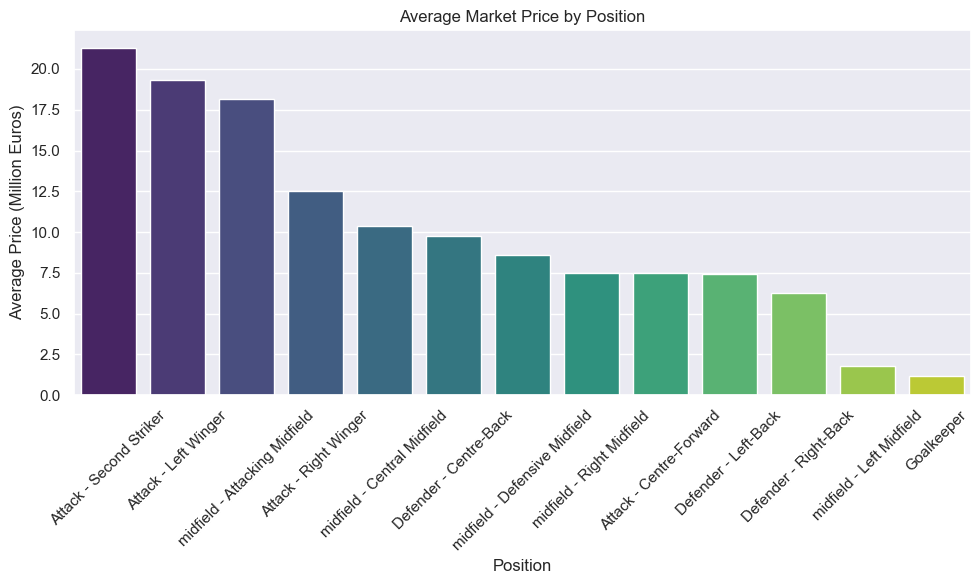

In [16]:
#Plot Average Rrice By Position
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_position.index, y=avg_price_position.values, palette="viridis")
plt.title("Average Market Price by Position")
plt.xlabel("Position")
plt.ylabel("Average Price (Million Euros)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Average Price By Nationality (Top 10)

/var/folders/26/v_t38xl53mq57t7j09142fn40000gn/T/ipykernel_70602/3631876146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


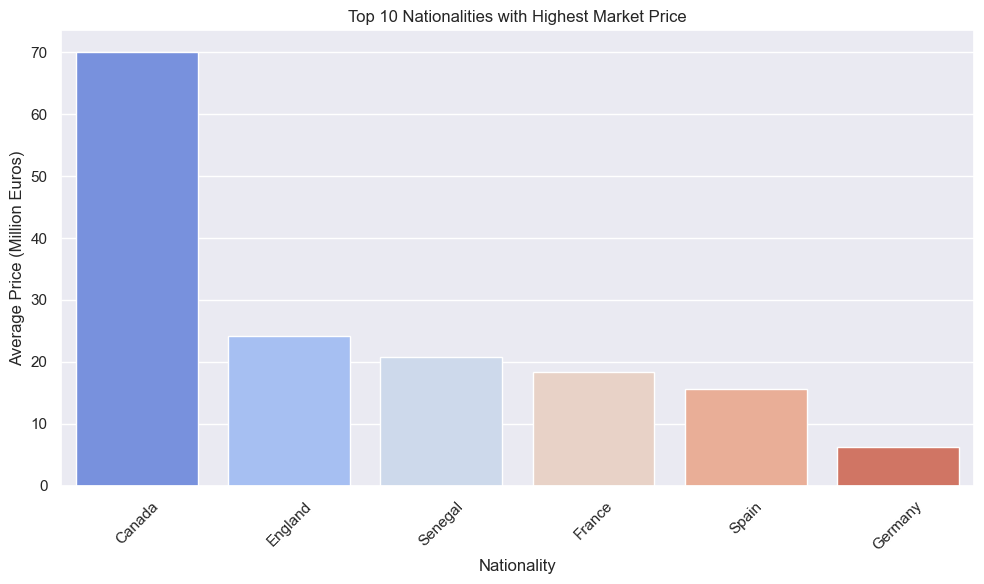

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_price_nationality.head(10).index,
    y=avg_price_nationality.head(10).values,
    palette="coolwarm",
)
plt.title("Top 10 Nationalities with Highest Market Price")
plt.xlabel("Nationality")
plt.ylabel("Average Price (Million Euros)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Exploring The Distribution Of Market Prices
This histogram with a Kernel Density Estimate (KDE) overlay helps us visualize the distribution of player market prices. It gives insights into whether the market is skewed towards low or high prices.

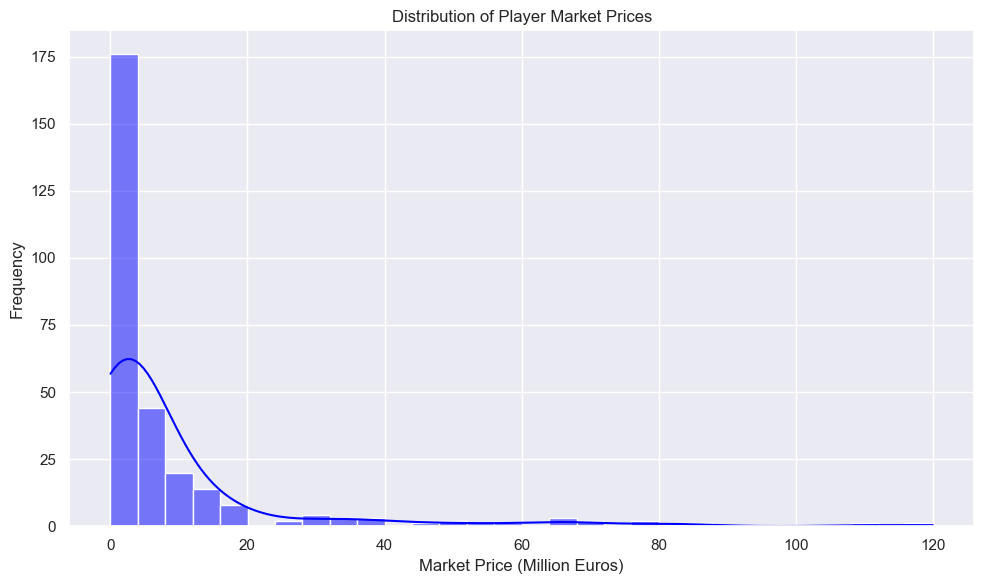

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data["price"], kde=True, bins=30, color="blue")
plt.title("Distribution of Player Market Prices")
plt.xlabel("Market Price (Million Euros)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Exploring Player Count By Position
These two plots provide insights into player counts by position. The first plot counts each player only once per season (based on the most recent season), while the second counts all appearances of players across multiple seasons.

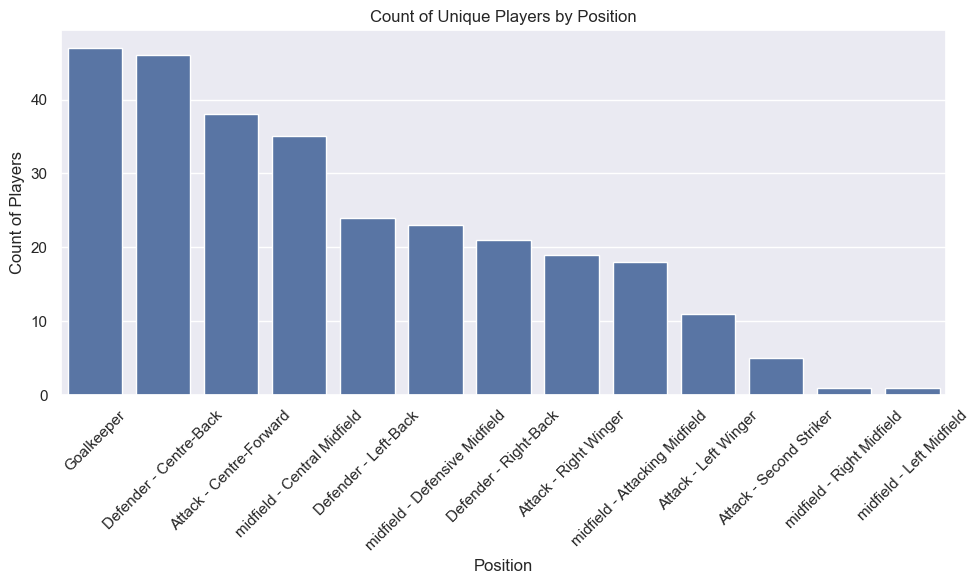

In [19]:
# Count of Players by Position (Unique Players)
bundesliga_unique_players = cleaned_data.drop_duplicates(subset="name", keep="last")
position_counts_unique = bundesliga_unique_players["position"].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(
    x="position", data=bundesliga_unique_players, order=position_counts_unique.index
)
plt.title("Count of Unique Players by Position")
plt.xlabel("Position")
plt.ylabel("Count of Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

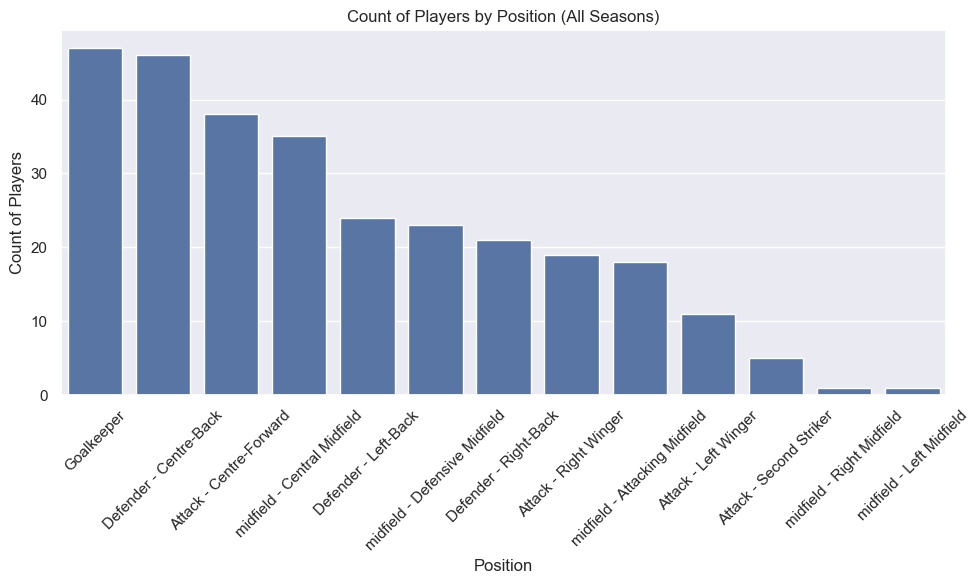

In [20]:
# Count of Players by Position (All Seasons)
position_counts_all = cleaned_data["position"].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x="position", data=cleaned_data, order=position_counts_all.index)
plt.title("Count of Players by Position (All Seasons)")
plt.xlabel("Position")
plt.ylabel("Count of Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Connection Between Position and Nationality 
The graph will allow you to visually compare how market prices are distributed across different nationalities and positions.
You will be able to see if certain positions tend to have higher prices within particular nationalities, as well as identify any outliers (players with unusually high or low prices).

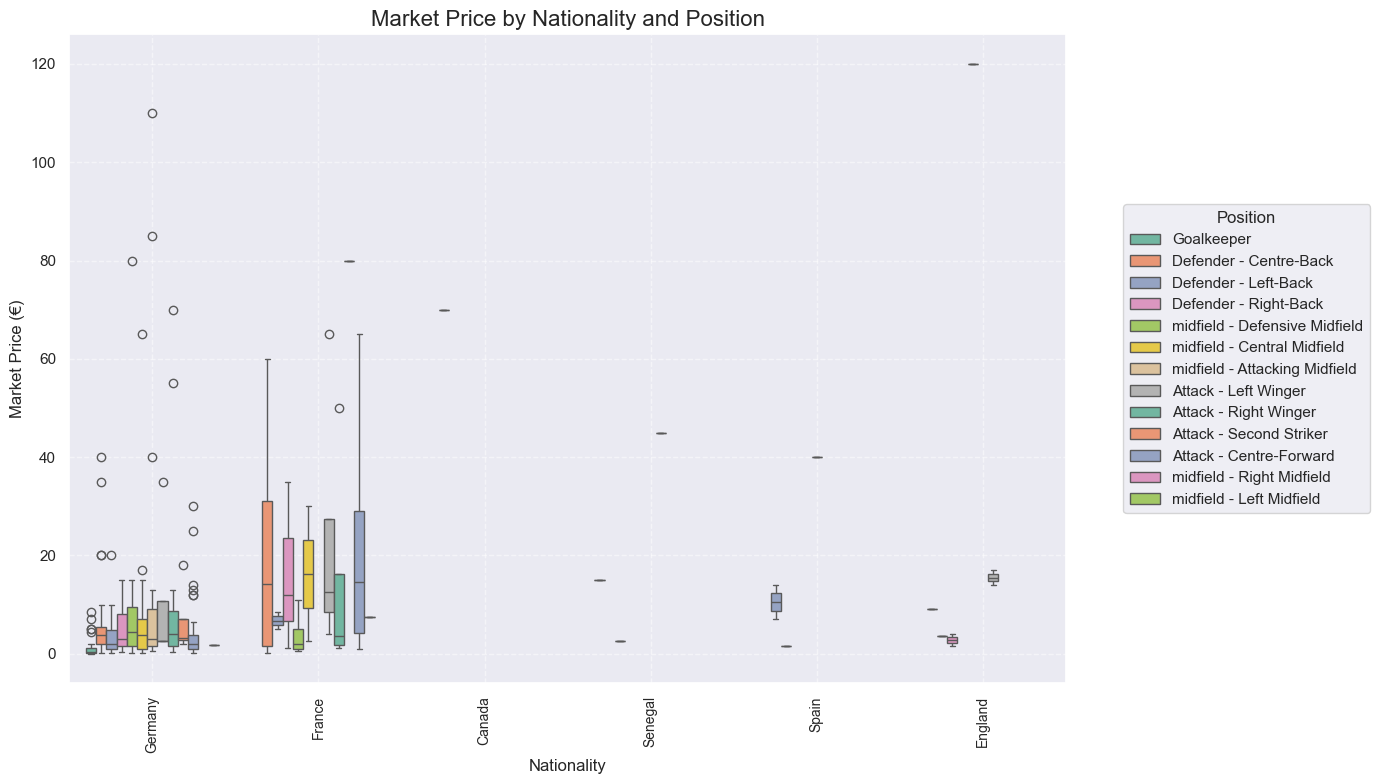

In [21]:
plt.figure(figsize=(14, 8))

top_nationalities = cleaned_data["nationality"].value_counts().head(10).index
filtered_data = cleaned_data[cleaned_data["nationality"].isin(top_nationalities)]

sns.boxplot(
    data=filtered_data, x="nationality", y="price", hue="position", palette="Set2"
)

plt.title("Market Price by Nationality and Position", fontsize=16)
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Market Price (€)", fontsize=12)

plt.xticks(rotation=90, fontsize=10)

plt.legend(title="Position", bbox_to_anchor=(1.05, 0.5), loc="center left")

plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

<br>

## **3. Discussion**

<br>

In conclusion, my goal was to explore the relationships between players' market prices and their positions and nationalities within the Bundesliga. The dataset provided valuable insights into how these factors, along with players’ market values, contribute to determining the worth of players in the football market. After cleaning and studying the data, I identified significant patterns and outliers that shed light on key trends in player valuation. In particular, the exploration of market prices by nationality and position revealed several intriguing findings, especially the influence of a player's position on their market price. Players in positions like forwards tend to have significantly higher average market prices, likely due to their direct impact on the game through goal-scoring contributions, whereas positions like defenders and goalkeepers tend to have lower average prices.

<br>

Additionally, I noticed substantial variation in market prices across different nationalities. Certain countries, such as Canada and England, showed notably high average market prices which might reflect a combination of factors such as international appeal, historical performance, and the overall football infrastructure in those regions. In the Bundesliga, teams are required to have at least 12 German-licensed players, and there is also a cap on international players. As a result, German clubs often pay higher prices for international stars due to their talent and market value. For instance, players from Canada had an extraordinarily high average price potentially due to the rising international visibility and success of players from smaller footballing nations. On the other hand, the lower prices for some nationalities may reflect less demand in the international market or a more niche footballing reputation.

<br>

Furthermore, I examined the influence of both position and nationality on the market prices of players. By segmenting the data into these categories, I could observe which positions command higher prices across different nationalities and whether nationality plays a significant role in determining a player's value. For instance, forwards across all nationalities tended to have higher market prices compared to players in defensive positions, which aligns with the general importance of offensive roles in football. The box plots and summary statistics helped in identifying outliers—players whose prices significantly deviated from the norm. These outliers represent unique cases where players may have exceeded or failed to meet market expectations due to factors like talent, age, or contractual circumstances.

<br>

In conclusion, this analysis highlighted the complex connection between player position, nationality, and market price. It is clear that while position plays a dominant role in determining player value and nationality can also introduce variations that reflect broader trends in the global football market. This insight can inform clubs, scouts, and analysts who aim to understand the factors driving player valuations in one of the most competitive and financially driven sports leagues in the world.

<br>

## **4. References**

- Dataset: https://www.kaggle.com/datasets/oles04/bundesliga-soccer-player

<br>

- Python Libraries: 
    - Pandas
    - Matplotlib
    - Numpy
    - Seaborn

<br>

- Code Resources 
     - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
     - https://www.w3schools.com/python/default.asp#gsc.tab=0
     - https://seaborn.pydata.org/generated/seaborn.barplot.html
     - https://seaborn.pydata.org/generated/seaborn.boxplot.html
     - https://seaborn.pydata.org/generated/seaborn.histplot.html
     - https://chatgpt.com/ - Prompt used: "How to use dropna function?" and "How to format the lenged for seaborn boxplot?"


